In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
import scienceplots

from nanonets import NanoparticleTunneling
from nanonets.utils import get_all_matrices_lattice, get_self_capacitance, get_tau_f0_SET, get_charging_energies, get_scaling_factor
from nanonets.utils import get_potential_phasor_lattice, get_current_phasor_lattice
import matplotlib.colors as mcolors

plt.style.use(["science","bright","grid"])

TAU_SET, F0_SET = get_tau_f0_SET()

def get_e_pos(L):
    return  [[(L-1)//2, 0],[0, 0],[L-1, 0],[0, (L-1)//2],[L-1, (L-1)//2],[0, L-1],[L-1, L-1],[(L-1)//2, L-1]]

### Charging Energy and Scaling

In [2]:
L_vals  = [3,4,5,6,7,8,9,10,11,12,13,14,15]
cap0    = 1.0
e_short = {}
cop_mat = {}
for L in L_vals:
    G_mat, G_u, C_mat, C_u  = get_all_matrices_lattice(L, get_e_pos(L), short_range=True)
    C_u                     = C_u.T
    C_inv                   = np.linalg.inv(C_mat)
    cop_mat[L]              = np.min((C_inv@C_u)[:,0])
    e_short[f"$L = {L}$"]   = 1000*get_charging_energies(C_inv)/0.160217662

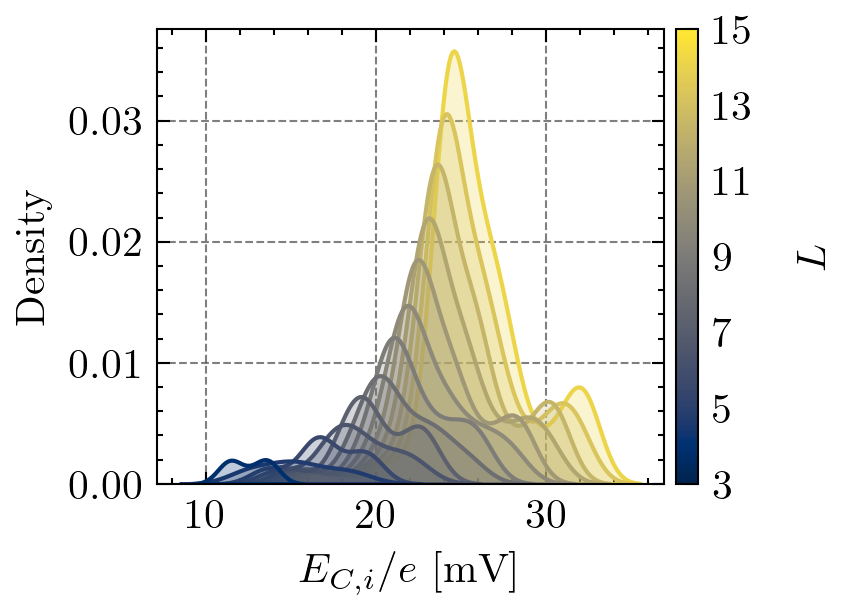

In [3]:
fig, ax     = plt.subplots(dpi=300)
w, h        = fig.get_size_inches()
scale       = 0.75
fig.set_size_inches(w * scale, h * scale)

_ = sns.kdeplot(e_short, fill=True, ax=ax, palette='cividis', legend=False)

vmin, vmax = 3, 15
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('cividis')
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(mappable, ax=ax, pad=0.02)
cbar.set_label("$L$", labelpad=10) # Optional formatting
cbar.set_ticks(np.arange(vmin, vmax + 1, 2))
_ = ax.set_xlabel("$E_{C,i} / e~[\mathrm{mV}]$")
# _ = ax.set_xlim(18,32)
# _ = ax.set_yscale('log')
# _ = ax.set_ylim(1e-4,1e-1)

# fig.savefig(f"plots/pdf/voltage_to_charge_i_zero.pdf", transparent=False)
# fig.savefig(f"plots/svg/voltage_to_charge_i_zero.svg", transparent=True)
# fig.savefig(f"plots/png/voltage_to_charge_i_zero.png", transparent=False)

# fig.savefig(f"plots/pdf/voltage_to_charge_i_0.28.pdf", transparent=False)
# fig.savefig(f"plots/svg/voltage_to_charge_i_0.28.svg", transparent=True)
# fig.savefig(f"plots/png/voltage_to_charge_i_0.28.png", transparent=False)

In [4]:
edge_means = []
bulk_means = []
for i, (key, arr) in enumerate(e_short.items()):
    L           = L_vals[i]
    edge_idx    = [n for n in range(L)]+[n*L for n in range(1,L-1)]+[n*L+(L-1) for n in range(1,L-1)]+[L*L-n for n in range(1,L+1)]
    bulk_idx    = [n for n in range(L*L) if n not in edge_idx]
    edge_mean   = np.max(arr[edge_idx])
    bulk_mean   = np.max(arr[bulk_idx])

    edge_means.append(edge_mean)
    bulk_means.append(bulk_mean)

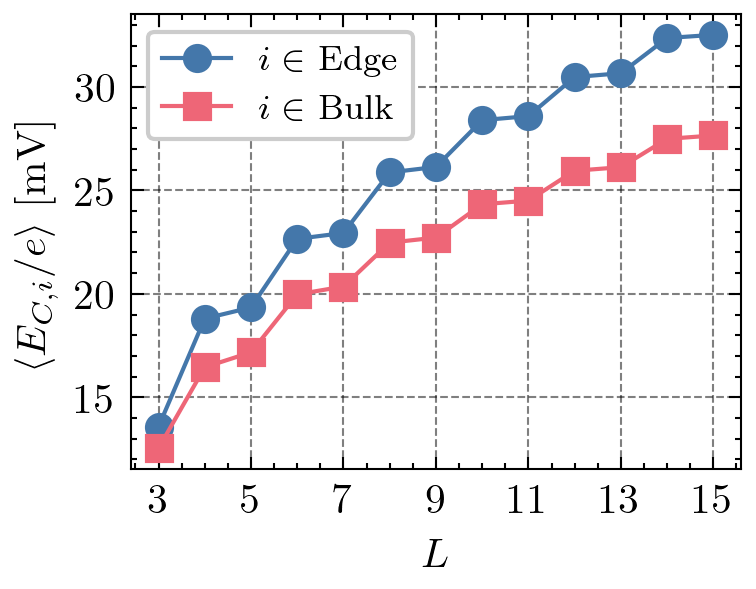

In [5]:
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
fig.set_size_inches(w * scale, h * scale)

_ = ax.plot(L_vals, edge_means, marker='o', label='$i \in $ Edge')
_ = ax.plot(L_vals, bulk_means, marker='s', label='$i \in $ Bulk')
_ = ax.set_xticks(L_vals[::2])
# _ = ax.set_ylim(20,28)
_ = ax.set_xlabel("$L$")
_ = ax.set_ylabel("$\\langle E_{C,i} / e \\rangle~[\mathrm{mV}]$")
_ = ax.legend(fontsize='small')

fig.savefig(f"plots/pdf/voltage_to_charge_i_bulk_vs_edge_zero.pdf", transparent=False)
fig.savefig(f"plots/svg/voltage_to_charge_i_bulk_vs_edge_zero.svg", transparent=True)
fig.savefig(f"plots/png/voltage_to_charge_i_bulk_vs_edge_zero.png", transparent=False)

# fig.savefig(f"plots/pdf/voltage_to_charge_i_bulk_vs_edge_0.28.pdf", transparent=False)
# fig.savefig(f"plots/svg/voltage_to_charge_i_bulk_vs_edge_0.28.svg", transparent=True)
# fig.savefig(f"plots/png/voltage_to_charge_i_bulk_vs_edge_0.28.png", transparent=False)

In [6]:
np.save("data/edge_mean_zero.npy", np.array(edge_means))
np.save("data/bulk_mean_zero.npy", np.array(bulk_means))

# np.save("data/edge_mean_0.28.npy", np.array(edge_means))
# np.save("data/bulk_mean_0.28.npy", np.array(bulk_means))